Specified Date and Time in HST: 2024-08-05 00:00:00
Local Hour Angle (LHA) of Polaris: 270.50°


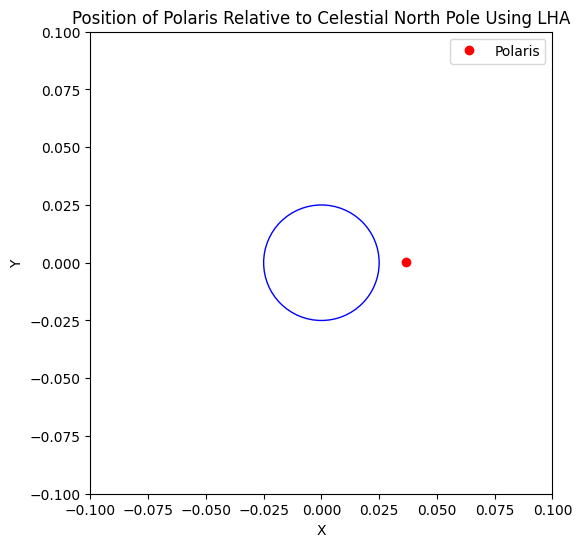

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time, TimeDelta
from astropy.coordinates import EarthLocation, SkyCoord
from astropy import units as u

def deg_to_deg_min(decimal_degrees):
    """
    Convert decimal degrees to degrees and decimal minutes.
    """
    degrees = int(decimal_degrees)
    minutes = (decimal_degrees - degrees) * 60
    return f"{degrees}° {minutes:.2f}'"

# Step 1: Specify the date and time in HST (Hawaii Standard Time)
# Format: 'YYYY-MM-DD HH:MM:SS'
specified_hst_time = '2024-08-05 00:00:00'  # Example date and time in HST

# Convert specified HST time to UTC
hst_offset = TimeDelta(10 * u.hour)  # HST is UTC-10
specified_time_utc = Time(specified_hst_time) + hst_offset

# Step 2: Define observer's location (Kona, Hawaii as an example)
latitude = 19.639994  # degrees
longitude = -155.996926  # degrees
altitude = 0.0  # meters

location = EarthLocation(lat=latitude * u.deg, lon=longitude * u.deg, height=altitude * u.m)

# Step 3: Define the coordinates of Polaris in the ICRS frame (J2000 epoch)
# Polaris coordinates: RA = 2h 31m 49.09s, Dec = +89° 15′ 50.8″ (J2000.0)
ra_polaris = '02h31m49.09s'
dec_polaris = '+89d15m50.8s'
polaris_icrs = SkyCoord(ra=ra_polaris, dec=dec_polaris, frame='icrs')

# Step 4: Calculate Local Sidereal Time (LST) at the observer's location
lst = specified_time_utc.sidereal_time('mean', longitude)

# Convert RA of Polaris to the same unit (hour angle in degrees)
ra_polaris_hour_angle = polaris_icrs.ra.hourangle

# Step 5: Calculate Local Hour Angle (LHA) of Polaris
lha_polaris = (lst.hour - ra_polaris_hour_angle) * 15  # Convert hours to degrees

# Ensure LHA is between 0° and 360°
lha_polaris = lha_polaris % 360

# Print the specified date in HST, LHA of Polaris
print(f"Specified Date and Time in HST: {specified_hst_time}")
print(f"Local Hour Angle (LHA) of Polaris: {lha_polaris:.2f}°")

# Step 6: Correct Plotting of Polaris on the Circle using LHA

# Convert LHA from degrees to radians for plotting on a unit circle
lha_radians = np.radians(lha_polaris)

# Distance from celestial north pole is based on declination offset from 90°
angular_separation = 90 - polaris_icrs.dec.degree

# Adjust the scale for visualization
scale_factor = 0.05  # Adjust this scale to visualize better on a small circle

# Convert to Cartesian coordinates for a circular plot (polar coordinates to Cartesian)
x = -scale_factor * angular_separation * np.sin(lha_radians)  # Negate to reflect correctly
y = scale_factor * angular_separation * np.cos(lha_radians)

# Create the plot
fig, ax = plt.subplots(figsize=(6, 6))

# Draw a circle representing the celestial sphere around the celestial north pole
circle = plt.Circle((0, 0), scale_factor * 0.5, color='b', fill=False)
ax.add_artist(circle)

# Plot the position of Polaris
ax.plot(x, y, 'ro', label='Polaris')

# Set plot properties for clarity
ax.set_aspect('equal', 'box')
ax.set_xlim(-0.1, 0.1)
ax.set_ylim(-0.1, 0.1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()

plt.title('Position of Polaris Relative to Celestial North Pole Using LHA')
plt.show()
